# Lab Sheet 7 (COM3502-4502-6502 Speech Processing)

This lab sheet is part of the lecture COM[3502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level3/com3502.html "Open web page for COM3502 module")-[4502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level4/com4502.html "Open web page for COM4502 module")-[6502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/msc/com6502.html "Open web page for COM4502 module") Speech Processing at the [University of Sheffield](https://www.sheffield.ac.uk/ "Open web page of The University of Sheffield"), Dept. of [Computer Science](https://www.sheffield.ac.uk/dcs "Open web page of Department of Computer Science, University of Sheffield").

It is probably easiest to open this Jupyter Notebook with [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb#recent=true "Open in Google Colab") since GitHub's Viewer does not always show all details correctly. <a href="https://colab.research.google.com/github/sap-shef/SpeechProcesssingLab/blob/main/Lab-Sheets/Lab-Sheet-7.ipynb"><img align="right" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open Notebook in Google Colab" title="Open and Execute the Notebook directly in Google Colaboratory"></a>

Please put questions, comments and correction suggestions in the [Blackboard](https://vle.shef.ac.uk) discussion board or send an email to [s.goetze@sheffield.ac.uk](mailto:s.goetze@sheffield.ac.uk).

In [9]:
# Let's do the ususal necessary and nice-to-have imports
%matplotlib inline
import matplotlib.pyplot as plt  # plotting
import seaborn as sns; sns.set() # styling ((un-)comment if you want)
import numpy as np               # math

# imports we need in addition for this lab sheet
from IPython import display as ipd

## A random Signal

We will deal with random signals in the following. A random signal with a [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution), a.k.a. Gaussian distribution, can be generated using `numpy`s function `np.random.normal()`. 

<br>
<a id='task_1'></a>
<div style="border: 2px solid #999; padding: 10px; background: #eee;">
    
**Task 1: Create a random signal**
    
<ul>
<li> 
    Use the function <code>np.random.normal()</code> to create a random signal of $1$ second length.
</li>     
<li> 
    Visualise and listen to the signal.
</li>  
<li> 
    Show the normal distribution by plotting the histogram of the function. The <code>hist()</code> function of <code>matplotlib</code> might be helpful for this.
</li> 
</ul>
</div>

In [23]:
# your code here:

# create a normally distributed random signal of legth 1 second
# ...

# visualise the signal
# ...

# visualise the histogram
# ...

# listen to the sound file
# ...

## A periodically repeated Random Signal

To add some *structure* to the signal we will generate a periodic random signal in the following by concatenating the same random signal several times.

<br>
<a id='task_2'></a>
<div style="border: 2px solid #999; padding: 10px; background: #eee;">
    
**Task 2: Create a peridic random signal**
    
<ul>
<li> 
    Use the function <code>np.random.normal()</code> to create a random signal of $P=100$ samples length.
</li>     
<li> 
    Create a signal of length $N=8000$ containing $N/P$ repetitions of the the previously generated signal. You can use the function <code>np.tile()</code> to create this longer signal.
</li>  
</ul>
</div>

In [26]:
# your code here
# ....

## Autocorrelation Sequence, a.k.a. Autocorrelation Function

We define the *autocorrelation function estimate* at a time shift $\kappa$ of the signal $x[k]$ of length $L$ as

\begin{equation}
\hat{r}_{xx}[\kappa] = \frac{1}{L} \sum_{k=1}^{L}x[k]x[k+\kappa]  \tag{1}
\label{eq:AutocorrelationEstFullSum}
\end{equation}

for all values of $\kappa$ from $0$ to $L-1$, i.e., for each $\kappa$ we correlate the non-shifted signal with a signal shifted by $\kappa$ samples.

We observe that the sum in (\ref{eq:AutocorrelationEstFullSum}) is not well defined as  $x[k+\kappa]$ is unknown for $k+\kappa>L$. We have to assume that the signals are zero-padded by as many zeros before and after the actual data as needed to calculate the sum. We call this *zero-padding*.

\begin{equation}
\hat{r}_{xx}[\kappa] = \frac{1}{L} \sum_{k=1}^{L-\kappa}x[k]x[k+\kappa] \tag{2}
\label{eq:AutocorrelationEst}
\end{equation}


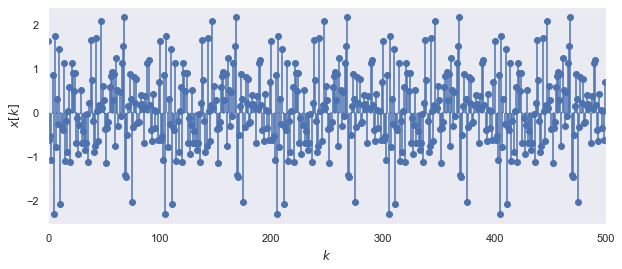

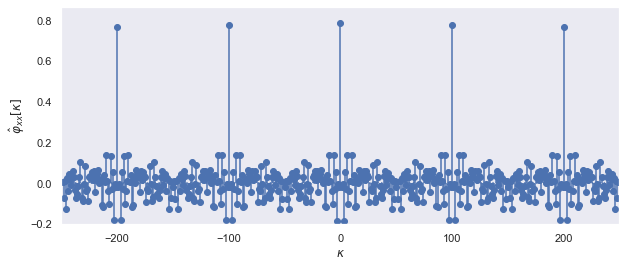

In [5]:
N = 8000 # total length of signal
P = 100  # period

# generate periodic random signal
np.random.seed(1)
x0 = np.random.normal(size=P)
x  = np.tile(x0, N//P)

plt.figure(figsize=(10, 4))
plt.stem(x[:2*K], basefmt='C0:', use_line_collection=True)
plt.xlim(0, 2*K)
plt.xlabel(r'$k$')
plt.ylabel(r'$x[k]$')
plt.grid()





K = 250  # upper/lower limit for lag in ACF



# compute and truncate ACF
acf = 1/len(x) * np.correlate(x, x, mode='full')
acf = acf[(len(x)-1)-(K-1):(len(x)-1)+K]
kappa = np.arange(-(K-1), K)

# plot signal and its ACF
plt.figure(figsize=(10, 4))
plt.stem(x[:2*K], basefmt='C0:', use_line_collection=True)
plt.xlim(0, 2*K)
plt.xlabel(r'$k$')
plt.ylabel(r'$x[k]$')
plt.grid()

plt.figure(figsize=(10, 4))
plt.stem(kappa, acf, basefmt='C0:', use_line_collection=True)
plt.xlabel(r'$\kappa$')
plt.ylabel(r'$\hat{\varphi}_{xx}[\kappa]$')
plt.axis([-K, K, 1.1*min(acf), 1.1*max(acf)])
plt.grid()

## Copyright

This notebook is licensed to be used during the lecture COM[3502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level3/com3502.html "Open web page for COM3502 module")-[4502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level4/com4502.html "Open web page for COM4502 module")-[6502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/msc/com6502.html "Open web page for COM4502 module") Speech Processing at the [University of Sheffield](https://www.sheffield.ac.uk/ "Open web page of The University of Sheffield"), Dept. of [Computer Science](https://www.sheffield.ac.uk/dcs "Open web page of Department of Computer Science, University of Sheffield"). Any further use (beyond use for the lecture) is only permitted if agreed with the [module lead](mailto:s.goetze@sheffield.ac.uk). 